# Quick review on Quasi Newton methods
## Author: Alfredo Garbuno-Inigo

<script type="text/x-mathjax-config">
  MathJax.Hub.Config({ TeX: { extensions: ["color.js"] }});
</script>

In mathematical applications one often wants to find the optimum of a given function, $f(x)$. Often, $x$ belongs to a high dimensional space. 

A grid search might be too expensive, and ideally the function is *well behaved* such that we want to use the most out of our function. 

The problem we want to solve is to find $x^*$ such that it minimises the $f(\cdot)$, *ie* 

$$ x^* = \arg \min_{x \in \mathbb{R}^n}  \, f(x). $$

## Iterative methods

Use an iterative numerical algorithm where we treat each iterand as our *best guess* at step $k$. Let $x_k$ be such iteration which we would hope to converge to the best point $x^*$.

The iterations are done in such a way that they satisfy 

$$ f(x_{k+1}) < f(x_k). $$ 


## Netwon's method 

It assumes a well behaved function. This means that it assumes our function to be *twice-differentiable*. That means in turn, that a **quadratic local approximation** is good enough at any given point of the domain. 

Centered at $x$, we use the second order Taylor expansion 

$$ f(x + p) \approx f(x) + p^\top \nabla f(x) + \frac{1}{2} p^\top \nabla^2 f(x) \,  p, $$

where $\nabla f(x)$, $\nabla^2 f(x)$ and $p$ denote the gradient, the Hessian and the direction of change with respect to the point of origin $x$, in which both gradient and Hessian are evaluated. 

In our iterative approach, this is can be rewritten as 

$$ f(x_k + p) \approx f(x_k) + p^\top \nabla f(x_k) + \frac{1}{2} p^\top \nabla^2 f(x_k) \,  p, $$

where it is easily seen that the each new point is defined as 

$$ x_{k+1} = x_k + p. $$

### How to choose the direction?

We assume that the quadratic model is good enough. And we find $p_k$ such that it minimises the quadratic approximation model 

$$ 
{\color{red} m_{\color{red}k} \color{red}(\color{red}p\color{red})} =  f(x_k) + p^\top \nabla f(x_k) + \frac{1}{2} p^\top \nabla^2 f(x_k) \,  p.
$$

First order conditions imply that 

$$ \nabla m_k(p_k) = 0, $$ 

and by second order conditions we expect that $\nabla^2 f(x_k)$ is a symmetric positive definite matrix.

This implies that 

$$ p_k = - H_k^{-1} g_k, $$

where $H_k$ and $g_k$ denote the **Hessian and gradient of $f$ evaluated at  $x_k$**, respectively.

This approach might work well, but to further guarantee good convergence conditions we use a fraction $\alpha$ of such descent direction. 

$$ x_{k+1} = x_k + {\color{red} \alpha} \, p_k, $$ 

where is $\alpha$ is commonly known as the **learning rate** in Machine learning or the **step length** in the Optimisation community. 

The task of finding a **good** step length $\alpha$ is called **line search**. 

### Limitations of Newton's method

To compute the gradient might be troublesome, but usually one is willing to spend the computational effort. 

For the Hessian in the other hand, it could be computationally too burdersome, *eg* the size of such matrix might be too expensive to allocate.

### Alternatives

An alternative is to use an iterative approximation to the Hessian, often denoted as $B$, such that it posses some ideal properties of the true Hessian.

The quadratic approximation changes to 

$$ {\color{red} m_k (p) } =  f(x_k) + p^\top g_k + \frac{1}{2} p^\top {\color{blue} B} \,  p. $$ 

First, we expect the approximated Hessian to satisfy the **secant equation**. That means, that in light of the previous approximation $B_k$, the gradient of $m_{k+1}$ should be the same as the objective function on  the latest two iterations, $x_{k}$ and $x_{k+1}$. 

The gradient of $m_{k+1}$ at $x_{k+1}$ is just $\nabla f_{k+1}$, **by definition**.

The gradient of $m_{k+1}$ at $x_k$ is 

$$\nabla m_{k+1} (- \alpha_k p_k ) = \nabla f_{k+1} - \alpha_k \, B \, p_k = \nabla f_k$$

or equivalently

$$ s_k = B^{–1} y_k,$$

where $s_k$ denotes the difference between succesive iterations  and $y_k$ the difference in gradients. 


We further ask our estimation of the Hessian to preserve symmetry and be an update from the previous one by the smallest change possible. 

This means that, we look for $B_{k+1}$ such that it solves the following optimisation problem

$$ 
\begin{align}
\begin{array}{ll}
\min_{B^{-1}} & \big| \big| B^{-1} - B_k^{-1} \big| \big|^2_F \\
\text{s.t.} & s_k = B^{-1} \, y_k \\
& B^{-1} \text{is symmetric}.
\end{array}
\end{align}
$$

The solution to this problem is 

$$ B_{k+1}^{-1} = \left( I - \rho_k\,s_ky_k^\top\right) B_{k}^{-1} \left( I - \rho_k\,y_ks_k^\top \right) + \rho_k\,s_ks_k^\top, $$

where $\rho_k = (y_k^\top s_k)^{-1}$. Which if we use the **Sherman-Morrison** formula is the same as a two rank update of the original Hessian

$$ B_{k+1} = B_k + \frac{y_k\,y_k^\top}{y_k^\top s_k} - \frac{B_k s_k \, (B_k s_k)^\top}{s_k^\top B_k s_k}. $$


### Properties of BFGS

We don't explicitly ask the Hessian approximation $B_{k+1}^{-1}$ to be positive definite. 

If the step length is chosen to satisfy the Wolfe conditions, then the product $s_k^\top y_k > 0$, this is called the **curvature condition**. 

Satisfying the curvature condition and having the previous $B_{k}^{-1}$ be *spd* we are sure to preserve the positive semidefinitiveness (say that aloud three times!). 

More on section 6.1 on Nocedal's book!

#### Why is it called the secant equation?

![img](https://upload.wikimedia.org/wikipedia/commons/thumb/9/92/Secant_method.svg/300px-Secant_method.svg.png)

The secant method uses updates of the form 

$$ x_k = x_{k-1} - f_{k-1} \frac{x_{k-1}-x_{k-2}}{f_{k-1}-f_{k-2}}, $$ 

which is like a first order Newton update 

$$ x_k = x_{k-1} - \frac{f_{k-1}}{f'_{k-1}} $$

with an approximation to the gradient 

$$ (x_{k-1} - x_{k-2}) \, f'_{k-1} = f_{k-1}-f_{k-2}.$$ 

**Complete the analogy with a first order approximation of the gradient**.

Content in this review was inspired by this [blog](http://aria42.com/blog/2014/12/understanding-lbfgs).

## Implementation

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
N = 300
X = np.linspace(-1.5, 1.5, N)
Y = np.linspace(-1.5, 2.5, N)
X, Y = np.meshgrid(X, Y)

In [3]:
pos = np.c_[X.flatten(), Y.flatten()]

In [4]:
a = 1.
b = 100.
f = (a - pos[:,0])**2 + b*(pos[:,1] - pos[:,0]**2)**2

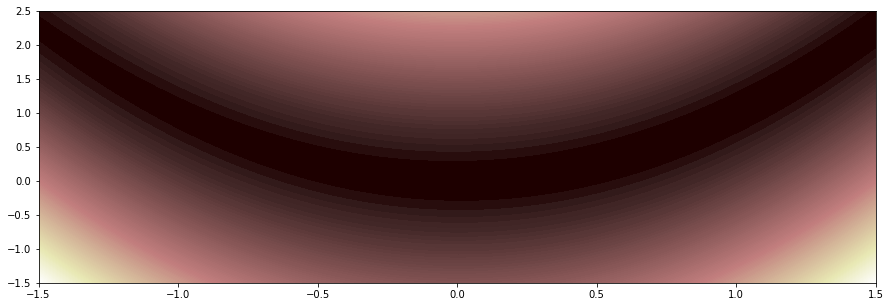

In [5]:
levels = np.exp(np.linspace(1., np.log(f.max()),8));
fig = plt.figure(figsize=(15, 5));
plt.contourf(X,Y,f.reshape(N,N),150,cmap = 'pink');
#plt.contour(X,Y,f.reshape(N,N),levels,colors = 'white');

In [6]:
def rosen(pos):
    f = (a - pos[0])**2 + b*(pos[1] - pos[0]**2)**2
    return f

def grad(pos):
    g = np.array([-2*(a-pos[0]) -4*b*pos[0]*(pos[1]-pos[0]**2),
                  2*b*(pos[1]-pos[0]**2)])
    return g

def Hess(pos):
    h11 = 2. - 4.*b*(pos[1]-pos[0]**2)+8.*b*pos[0]**2
    h12 = -4.*b*pos[0]
    h22 = 2.*b
    return np.array([[h11,h12],[h12,h22]])

def linesearch(p, g, f, x): 
    c1 = 10e-4
    c2 = 0.9
    alpha = 1.
    nbis = 0
    
    while nbis <= 30:
        fnew = rosen(x + alpha * p)
        gnew = grad(x + alpha * p)
        
        if (fnew <= f + c1 * alpha * np.dot(p,g)):
            nbis = 31
        else: 
            alpha = alpha * .8
            nbis += 1
            
    return alpha

## Steepest descent

In [7]:
niter = 1000
x0 = np.array([-1.2,1.])

Xall_sd = x0
xold = x0

for n in range(niter):
    p = - grad(xold)/np.linalg.norm(grad(xold))
    alpha = linesearch(p, grad(xold), rosen(xold), xold)
    xnew = xold + alpha * p
    Xall_sd = np.vstack([Xall_sd, xnew])
    
    if np.linalg.norm(grad(xnew)) < 1e-8:
        break
    
    xold = xnew
    
n_sd = n

## Newton's method

In [8]:
niter = 100

Xall_nw = x0
xold = x0

for n in range(niter):
    p = - np.linalg.solve(Hess(xold), grad(xold))
    alpha = linesearch(p, grad(xold), rosen(xold), xold)
    xnew = xold + alpha * p
    Xall_nw = np.vstack([Xall_nw, xnew])
    
    if np.linalg.norm(grad(xnew)) < 1e-8:
        break
    
    xold = xnew

n_nw = n

## Quasi Netwon with BFGS

In [9]:
niter = 100

Xall_bfgs = x0
xold = x0

Hold = (1./np.linalg.norm(grad(xold))) * np.identity(2)

for n in range(niter):
    p = - np.matmul(Hold, grad(xold))
    alpha = linesearch(p, grad(xold), rosen(xold), xold)
    s = alpha * p
    xnew = xold + alpha * p
    y = grad(xnew) - grad(xold)
    rho = 1./np.dot(y,s) 
    
    if np.linalg.norm(grad(xnew)) < 1e-8:
        break
    
    Hnew = np.matmul(np.identity(2) - rho * np.outer(s,y), 
              np.matmul(Hold, np.identity(2) - rho * np.outer(y,s))) + rho * np.outer(s,s)
    
    Xall_bfgs = np.vstack([Xall_bfgs, xnew])
    xold = xnew
    Hold = Hnew
    
n_bfgs = n

In [10]:
def plot_iter(Xall, steps = 1, niter = 100):
    fig = plt.figure(figsize=(15, 5));
    plt.contourf(X,Y,f.reshape(N,N),150,cmap = 'pink',zorder=1);
    plt.plot(Xall[range(0,niter,steps),0], Xall[range(0,niter,steps),1],zorder=3);
    plt.scatter(Xall[range(0,niter,steps),0], Xall[range(0,niter,steps),1],zorder=3);

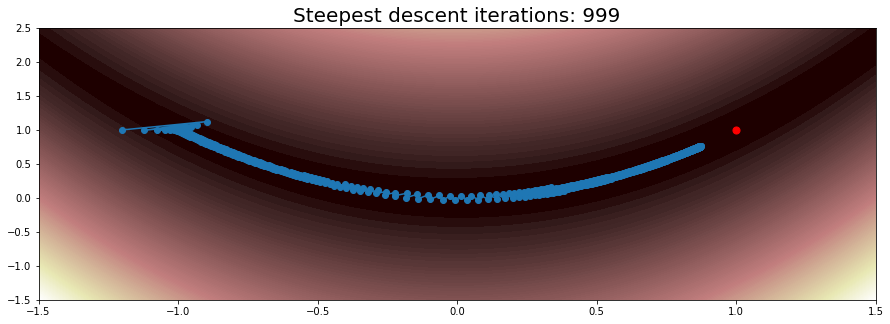

In [11]:
plot_iter(Xall_sd, steps = 1, niter = n_sd)
plt.title("Steepest descent iterations: %s"%(n_sd), fontsize = 20);
plt.scatter(1,1,c = 'r', s = 50);

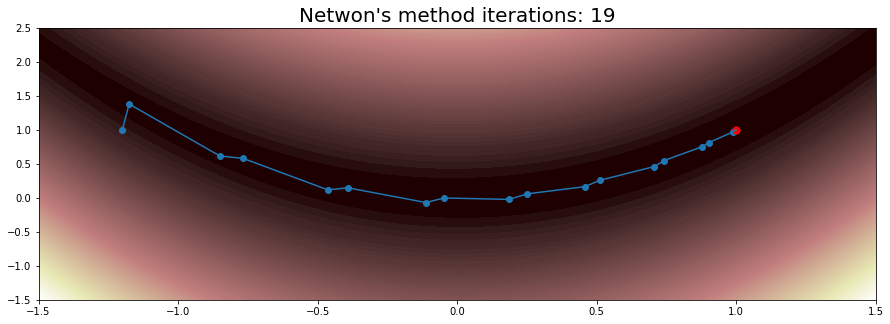

In [12]:
plot_iter(Xall_nw, niter = n_nw)
plt.title("Netwon's method iterations: %s"%(n_nw), fontsize = 20);
plt.scatter(1,1,c = 'r', s = 50, zorder = 3);

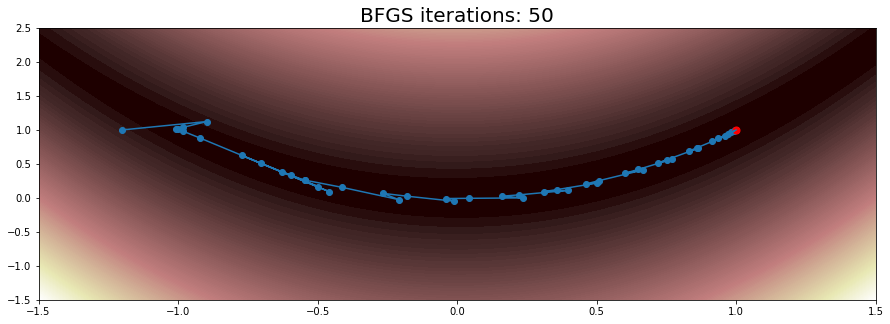

In [13]:
plot_iter(Xall_bfgs, niter = n_bfgs)
plt.title("BFGS iterations: %s"%(n_bfgs), fontsize = 20);
plt.scatter(1,1,c = 'r', s = 50, zorder = 3);

In [14]:
qlines_nw = list()
for n in range(Xall_nw.shape[0]):
    h = rosen(Xall_nw[n,:])
    g = grad(Xall_nw[n,:])
    H = Hess(Xall_nw[n,:])
    
    px = pos - Xall_nw[n,:]
    
    qlines_nw.append(h + np.matmul(px, g) + 0.5 * (np.matmul(px, H) * px).sum(axis = 1))

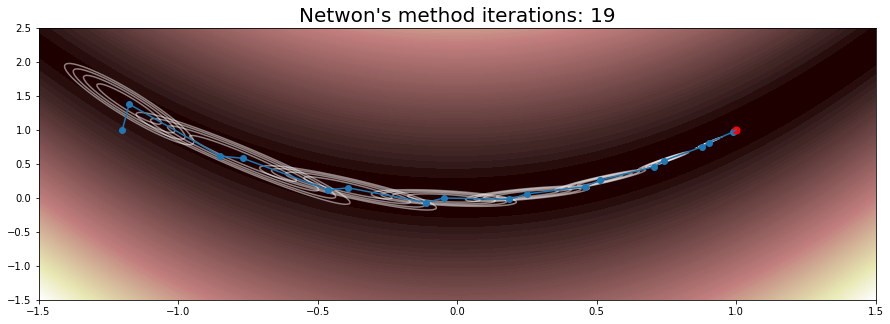

In [16]:
plot_iter(Xall_nw, niter = n_nw)
plt.title("Netwon's method iterations: %s"%(n_nw), fontsize = 20);
plt.scatter(1,1,c = 'r', s = 50, zorder = 3);
for n in range(0,len(qlines_nw),2):
    plt.contour(X,Y,qlines_nw[n].reshape(N,N), np.linspace(qlines_nw[n].min(),2*qlines_nw[n].min(),5), colors = 'w', alpha = 0.5,zorder = 2);

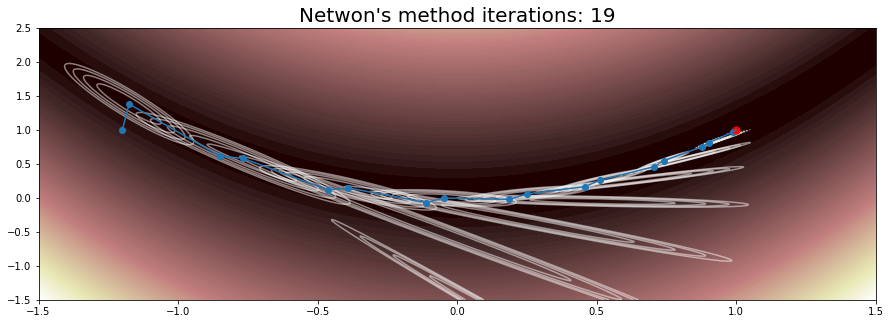

In [17]:
plot_iter(Xall_nw, niter = n_nw)
plt.title("Netwon's method iterations: %s"%(n_nw), fontsize = 20);
plt.scatter(1,1,c = 'r', s = 50, zorder = 3);
for n in range(0,len(qlines_nw),1):
    plt.contour(X,Y,qlines_nw[n].reshape(N,N), np.linspace(qlines_nw[n].min(),2*qlines_nw[n].min(),5), colors = 'w', alpha = 0.5,zorder = 2);